## Importing of packages/modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Import raw data and process where necessary

In [2]:
# Raw data held in a csv file which contains data regarding defence spending broken down by year and European county.
# Data taken from The Organisation for Economic Co-operation and Development.

oecd = pd.read_csv ('OECD_Defence_Copy.csv')

In [3]:
# Drop unneeded columns from the data

oecd_new = oecd.drop(['INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes'],axis=1)

In [4]:
# Replace names of countries with full country name, will enable easier merging of dataframes later.

oecd_new = oecd_new.replace(['GRC', 'NLD', 'DEU', 'CZE', 'ITA', 'PRT', 'CHE', 'POL', 'SVK', 'SVN', 'IRL', 'BEL', 'ISL', 'SWE', 'ESP', 'NOR', 'AUT', 'EST', 'FRA', 'LUX', 'HUN', 'DNK', 'GBR', 'FIN', 'LVA', 'LTU'],
                             ['Greece', 'Netherlands', 'Germany', 'Czech Republic', 'Italy', 'Portugal', 'Switzerland', 'Poland', 'Slovak Republic', 'Slovenia', 'Ireland', 'Belgium', 'Iceland', 'Sweden', 'Spain', 'Norway', 'Austria', 'Estonia', 'France', 'Luxembourg', 'Hungry', 'Denmark', 'United Kingdom', 'Finland', 'Latvia', 'Lithuania'])

In [5]:
# View dataframe

oecd_new

,LOCATION,TIME,Value
0,Greece,1999,3.348563
1,Greece,2000,2.394382
2,Greece,2001,2.582890
3,Greece,2002,2.888767
4,Greece,2003,3.645515
...,...,...,...
540,Lithuania,2015,1.257280
541,Lithuania,2016,1.478303
542,Lithuania,2017,1.624267
543,Lithuania,2018,1.719986


In [6]:
# Use the groupby function to sort our dataframe via year with corrosponding GDP.

group = oecd_new['Value'].groupby(oecd_new['TIME'])

In [7]:
# Find the mean of the above for each year and store in the variable known as 'chart1' to be plotted

chart1 = group.mean()

In [8]:
chart1

TIME
1999    1.371186
2000    1.298942
2001    1.303915
2002    1.343269
2003    1.343362
2004    1.291733
2005    1.248385
2006    1.249305
2007    1.239909
2008    1.257622
2009    1.306751
2010    1.263398
2011    1.169252
2012    1.134038
2013    1.110970
2014    1.078382
2015    1.094506
2016    1.136175
2017    1.165843
2018    1.166882
2019    1.143560
Name: Value, dtype: float64

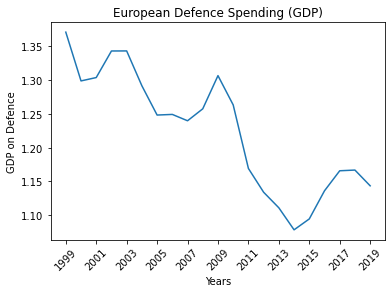

In [9]:
# Plot graph using above new series object. This shows us the total defence spending, by year, of all countries across the 
# time period from 1999 - 2019.

plt.plot(chart1)
np.arange (1999, 2019)
plt.xticks (np.arange(1999,2020,step=2), rotation = 45)
plt.title('European Defence Spending (GDP)')
plt.xlabel('Years')
plt.ylabel('GDP on Defence')
plt.show()

In [10]:
# Import Global Terror (GTD) dataset using pandas .read function to read in the .xlsx file into a dataframe.

global_terror = pd.read_excel ('Global_Terror.xlsx')

In [11]:
# Assign rows in dataset which take place before 1988 to varible 'index_names'

index_names = global_terror[ global_terror['iyear'] <= 1998 ].index

In [12]:
# Drop above from dataset

global_terror.drop(index_names, inplace = True)

In [13]:
# Assign some rows not belonging to western europe to varible called 'index_names2'

index_names2 = global_terror[ global_terror['region'] <=7].index

In [14]:
# Drop the above from the dataset

global_terror.drop(index_names2, inplace = True)

In [15]:
index_names3 = global_terror[ global_terror['region'] >=9].index

In [16]:
global_terror.drop(index_names3, inplace = True)

In [17]:
# Check if there are any duplicated rows

global_terror[global_terror.duplicated()]

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related


In [18]:
cols = [3,4,6,9,10,11,12,13,14,16,17,18,22,23,24,30,31,32,33,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,
        56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,
       95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,
       125,126,127,128,129,130,131,132,133,134]

In [19]:
# Drop columns of dataset which do not add anything to our dataframe. Focus here is on features which could arguably be
# known before an attack were to take place.

global_terror = global_terror.drop(global_terror.columns[cols], axis=1)

In [20]:
# Merge our two data frames, GTD dataframe and our OECD (Defence Spending by European Country) dataframe.

global_terror = global_terror.merge(oecd_new, left_on=['country_txt', 'iyear'], right_on=['LOCATION', 'TIME'])

In [21]:
# Drop repeated columns as a result of the merge

global_terror = global_terror.drop(['LOCATION', 'TIME'],axis=1)

In [22]:
# Rename column to reflect the values held in that column

global_terror = global_terror.rename(columns = {'Value':'Defence Spending GDP%'})

In [23]:
# Dataframe following changes above, columns will still need to be removed.

global_terror

,eventid,iyear,imonth,extended,country,country_txt,specificity,crit1,crit2,crit3,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,nperps,Defence Spending GDP%
0,199901030001,1999,1,0,78,Greece,1.0,1,1,1,0,1,0,3,Bombing/Explosion,8,Educational Institution,NaN,3.348563
1,199901110001,1999,1,0,78,Greece,1.0,1,1,1,0,1,0,7,Facility/Infrastructure Attack,2,Government (General),NaN,3.348563
2,199902080002,1999,2,0,78,Greece,1.0,1,1,1,0,0,0,3,Bombing/Explosion,7,Government (Diplomatic),NaN,3.348563
3,199903220001,1999,3,0,78,Greece,1.0,1,1,1,1,1,0,3,Bombing/Explosion,1,Business,NaN,3.348563
4,199903220002,1999,3,0,78,Greece,1.0,1,1,1,1,0,0,3,Bombing/Explosion,1,Business,NaN,3.348563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,201909170004,2019,9,0,98,Italy,1.0,1,1,0,0,1,0,2,Armed Assault,4,Military,1.0,1.266261
3779,201904220009,2019,4,0,199,Switzerland,1.0,1,1,1,0,0,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),-99.0,0.815365
3780,201908060012,2019,8,0,55,Denmark,1.0,1,1,1,0,1,0,3,Bombing/Explosion,2,Government (General),2.0,1.122569
3781,201908100012,2019,8,0,55,Denmark,1.0,1,1,1,0,1,0,3,Bombing/Explosion,3,Police,-99.0,1.122569


In [24]:
cols2 = [2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18]

In [25]:
# Create a variable called 'base_chart' with only a few features

base_chart = global_terror.drop(global_terror.columns[cols2], axis=1)

In [62]:
global_terror2 = global_terror.drop(['eventid', 'iyear', 'country', 'attacktype1', 'targtype1'],axis=1)
global_terror2.loc[(global_terror2.nperps == -99),'nperps']= None
global_terror2.nperps.fillna(global_terror2.nperps.mean(), inplace=True)
correlation = pd.DataFrame(global_terror2.corrwith(global_terror2["success"]))
correlation = correlation.sort_values(correlation.columns[0])
print(correlation)

                              0
crit1                 -0.029197
imonth                -0.025918
crit2                 -0.020668
crit3                 -0.006789
extended              -0.001353
nperps                 0.024692
suicide                0.026823
multiple               0.064446
specificity            0.071239
Defence Spending GDP%  0.079972
success                1.000000


In [27]:
# variable created which stores the details of all attacks which were not
# successful

filter_success = base_chart[ base_chart['success'] <= 0].index

In [28]:
# New variable called 'base_chart_b' contains only attacks that were a success

base_chart_b = base_chart.drop(filter_success)

In [29]:
# Count the total attacks per year

base_chart = base_chart.groupby(['iyear'])['eventid'].count()

In [30]:
# Place the result of the above in a dataframe

base_chart = pd.DataFrame(base_chart)

In [31]:
# Count the number of attacks that were successful

base_chart_b = base_chart_b.groupby(['iyear'])['eventid'].count()

In [32]:
# Place the above in a dataframe

base_chart_b = pd.DataFrame(base_chart_b)

In [33]:
# Combine dataframe with total attacks per year and dataframe with total 
# successful attacks per year

chart2 = pd.merge(base_chart,base_chart_b,on='iyear')

In [34]:
# Rename columns to better reflect the values they hold

chart2.rename(columns = {'eventid_x':'Total Attacks', 'eventid_y':'Successful Attacks'}, inplace = True)

In [35]:
# Order of columns changed

chart2 = chart2 [['Successful Attacks', 'Total Attacks']]

In [36]:
# New column added to record unsuccessful attacks

chart2['Unsuccessful Attacks'] = chart2['Total Attacks'] - chart2['Successful Attacks']

In [37]:
# Total attacks column dropped so we can show just succsesful and unsuccessful
# attacks. This means we can now show them on a stacked bar graph.

chart2 = chart2.drop(['Total Attacks'],axis=1)

In [38]:
chart2

,Successful Attacks,Unsuccessful Attacks
iyear,,
1999,189,46
2000,209,42
2001,182,51
2002,100,19
2003,89,32
2004,49,9
2005,98,6
2006,84,14
2007,65,10


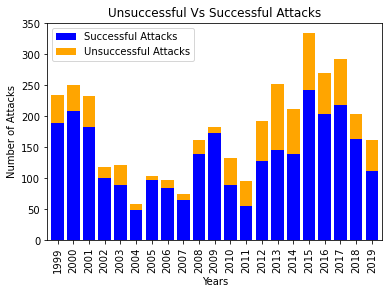

In [39]:
# Above is placed in a stacked bar chart which allows us to easily contrast
# total, successful and unsuccessful attacks over a two decade period

chart2.plot.bar(width = 0.8, color = ['Blue', 'Orange'], stacked=True)
plt.title('Unsuccessful Vs Successful Attacks')
plt.xlabel('Years')
plt.ylabel('Number of Attacks')
plt.legend(loc='upper left')

In [40]:
cols3 = [1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18]

In [41]:
# Create new variable called base_pie 

base_pie = global_terror.drop(global_terror.columns[cols3], axis=1)

In [42]:
# Count the number of different attack types used since 1999 - 2019 and place
# this in a new dataframe.

base_pie_2 = pd.DataFrame(base_pie['attacktype1_txt'].value_counts(ascending=True))

In [43]:
# Create a new column which turns this count into a percentage of all attacks

base_pie_2['Percentage'] = base_pie_2['attacktype1_txt']/3783*100

In [44]:
base_pie_2 = base_pie_2.drop(['attacktype1_txt'],axis=1)

In [45]:
# Due to high number of classifications it is necessary to combine those which have small values into one class.

base_pie_2 = base_pie_2.drop(['Unknown','Hostage Taking (Kidnapping)', 'Hijacking', 'Hostage Taking (Barricade Incident)', 'Unarmed Assault'], axis=0)

In [46]:
# New class with the above incorporated created and added to the dataframe

base_pie_2.loc['Hostage/Hijack/Other'] = 5.101771

In [47]:
# Final dataframe with types of terror attacks and their respective percentage 

base_pie_2

,Percentage
Assassination,2.194026
Armed Assault,14.750198
Facility/Infrastructure Attack,27.676447
Bombing/Explosion,50.277557
Hostage/Hijack/Other,5.101771


In [48]:
explode = [0.05,0.05,0.05,0.05,0.05]

colors = ['orange','blue','green','red', 'c']

<ipython-input-49-4b3c2a3d833b>:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(base_pie_2, labels=base_pie_2.index, explode = explode, autopct='%1.1f%%', colors = colors )


Text(0.5, 1.0, 'European Terrorist attacks by type')

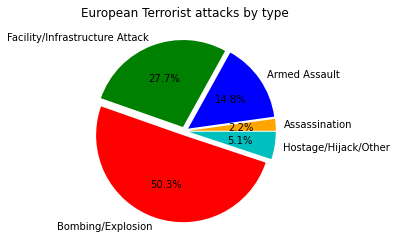

In [49]:
# Pie graph created using Matplotlib to demonstrate the data from the dataframe above.

plt.pie(base_pie_2, labels=base_pie_2.index, explode = explode, autopct='%1.1f%%', colors = colors )
plt.title('European Terrorist attacks by type')

In [50]:
cols4 = [1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18]

In [51]:
# Variable created for our new dataframe to show attacks committed against which European Country.

base_bar =  global_terror.drop(global_terror.columns[cols4], axis=1)

In [52]:
# Renaming of the country column name

base_bar.rename(columns = {'country_txt':'European Country'}, inplace = True)

In [53]:
# Place in a dataframe and count the number of times each country appears in the dataframe. This data is sorted in
# ascending order.

base_bar = pd.DataFrame(base_bar['European Country'].value_counts(ascending=True))

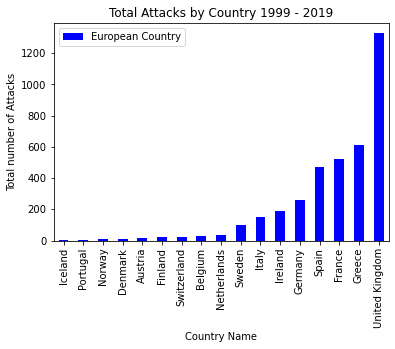

In [54]:
# Bar char used to show the number of attacks.

base_bar.plot.bar(color='blue')
plt.title('Total Attacks by Country 1999 - 2019')
plt.xlabel('Country Name')
plt.ylabel('Total number of Attacks')
plt.legend(loc='upper left')

In [55]:
# New variable used to capture the defence spending as percentage of GDP. Groupby used to capture by country.

chart4 = oecd_new['Value'].groupby(oecd_new['LOCATION'])

In [56]:
# The mean of the GDP for each year per country is calculated.

chart4 = chart4.mean()

In [57]:
# Above is placed into a dataframe

chart4 = pd.DataFrame(chart4)

In [58]:
# Column name is changed to better reflect the values held in the column

chart4.rename(columns = {'Value':'Defence Spending - GDP%'}, inplace = True)

In [59]:
# sort.values used to order the countries by their GDP spending

chart4.sort_values(by=['Defence Spending - GDP%'], inplace=True)

In [60]:
chart4.index.names =['Country']

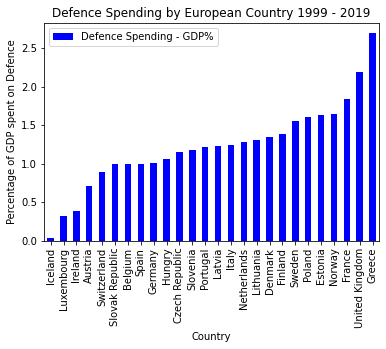

In [61]:
# Chart created using matplotlib which shows each country defence spending as a percentage of their GDP as a mean over a
# 20 year period from 1999 - 2019.

chart4.plot.bar(color='blue')
plt.title('Defence Spending by European Country 1999 - 2019')
plt.ylabel('Percentage of GDP spent on Defence')
plt.legend(loc='upper left')